# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [9]:
train, test = keras.datasets.cifar10.load_data()

In [10]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [11]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [35]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 20
BATCH_SIZE = 256
MOMENTUM = 0.95

In [40]:
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
def train_model(opt_name):
    results = {}
    for lr in LEARNING_RATE:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with LR = %.6f" % (lr))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.Adam(lr=lr) #, nesterov=True, momentum=MOMENTUM
        optimizer.lr = lr
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)
    
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
    
        exp_name_tag = opt_name + "_" +"exp-lr-%s" % str(lr)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}
    return results


#optimizer = keras.optimizers.SGD(nesterov=True, momentum=MOMENTUM)
#results_sgd = train_model("SGD")

#optimizer = keras.optimizers.RMSprop(nesterov=True, momentum=MOMENTUM)
#results_rmsprop = train_model("RMSprop")

#optimizer = keras.optimizers.Adagrad(nesterov=True, momentum=MOMENTUM)
#results_adagrad = train_model("Adagrad")

#optimizer = keras.optimizers.Adam(nesterov=True, momentum=MOMENTUM)
results_adam = train_model("Adam")





Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 12s 243us/step - loss: 1.9456 - acc: 0.2975 - val_loss: 1.7495 - val_acc: 0.3823
Epoch 2/20
50000/50000 [==============================] - 11s 217us/step - loss: 1.7150 - acc: 0.3866 - val_loss: 1.6811 - val_acc: 0.4007
Epoch 3/20
50000/50000 [==============================] - 10s 209us/step - loss: 1.6177 - acc: 0.4222 - val_loss: 1.6031 - val_acc: 0.4235
Epoch 4/20
50000/50000 [==============================] - 12s 244us/step - loss: 1.5471 - acc: 0.4504 - val_loss: 1.5788 - val_acc: 0.4289
Epoch 5/20
50000/50000 [==============================] - 12s 239us/step - loss: 1.5082 - acc: 0.4623 - val_loss: 1.4813 - val_acc: 0.4733
Epoch 6/20
50000/50000 [==============================] - 11s 225us/step - loss: 1.4564 - acc: 0.4806 - val_loss: 1.4570 - val_acc: 0.4794
Epoch 7/20
50000/50000 [==============================] - 10s 206us/step - loss: 1.4229 - acc: 0.4929 - val_loss: 1.

Epoch 4/20
50000/50000 [==============================] - 11s 215us/step - loss: 1.8078 - acc: 0.3726 - val_loss: 1.7888 - val_acc: 0.3758
Epoch 5/20
50000/50000 [==============================] - 11s 214us/step - loss: 1.7703 - acc: 0.3848 - val_loss: 1.7552 - val_acc: 0.3874
Epoch 6/20
50000/50000 [==============================] - 12s 238us/step - loss: 1.7403 - acc: 0.3944 - val_loss: 1.7284 - val_acc: 0.3992
Epoch 7/20
50000/50000 [==============================] - 9s 190us/step - loss: 1.7145 - acc: 0.4046 - val_loss: 1.7081 - val_acc: 0.4052
Epoch 8/20
50000/50000 [==============================] - 10s 194us/step - loss: 1.6917 - acc: 0.4125 - val_loss: 1.6864 - val_acc: 0.4122
Epoch 9/20
50000/50000 [==============================] - 11s 214us/step - loss: 1.6718 - acc: 0.4197 - val_loss: 1.6677 - val_acc: 0.4190
Epoch 10/20
50000/50000 [==============================] - 12s 245us/step - loss: 1.6547 - acc: 0.4238 - val_loss: 1.6567 - val_acc: 0.4244
Epoch 11/20
50000/50000 [==

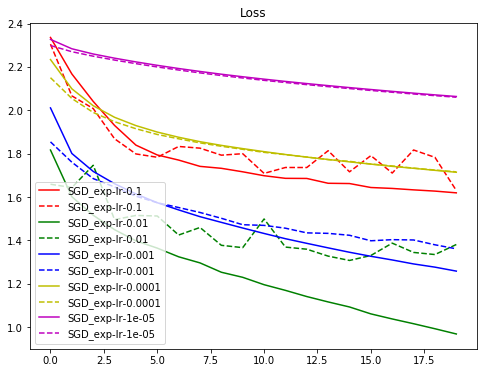

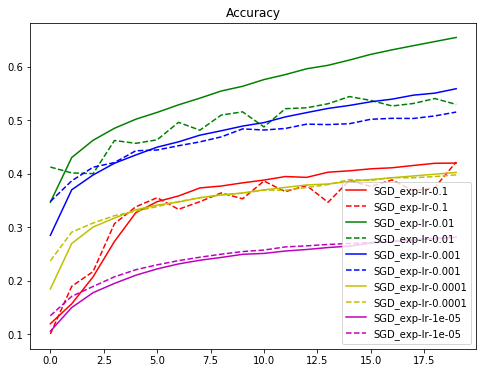

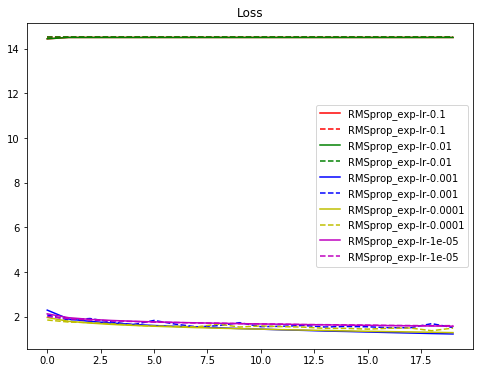

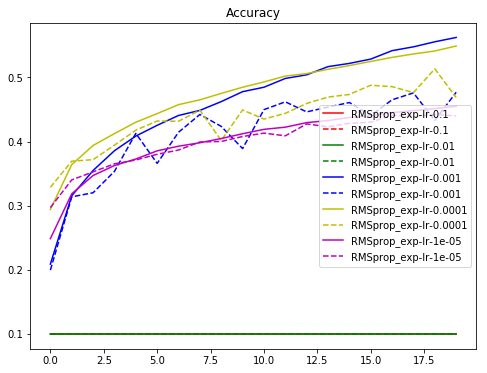

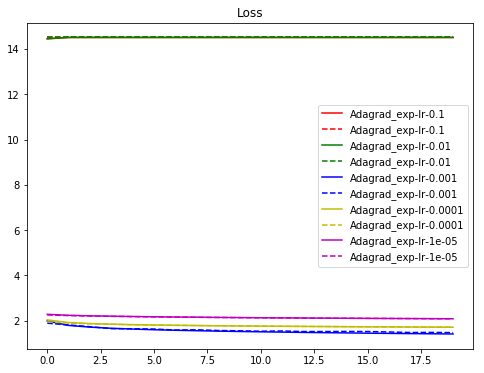

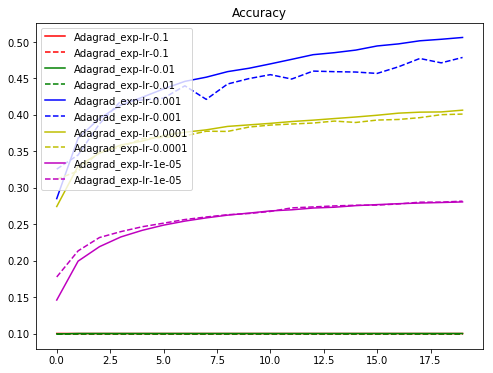

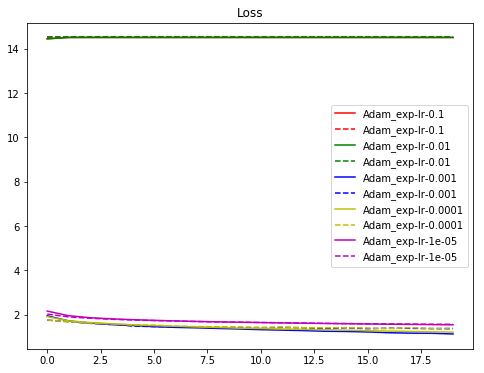

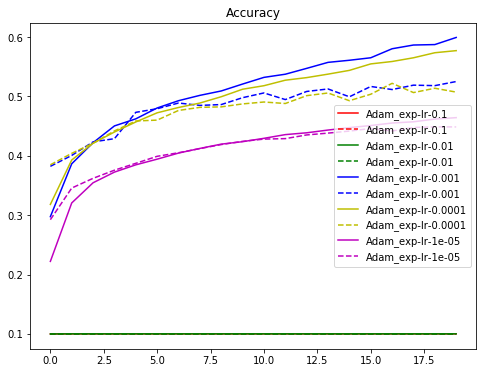

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

def result_picture(results):
    color_bar = ["r", "g", "b", "y", "m", "k"]

    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
    plt.title("Loss")
    plt.legend()
    plt.show()

    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
    plt.title("Accuracy")
    plt.legend()
    plt.show()
    
result_picture(results_sgd)
result_picture(results_rmsprop)
result_picture(results_adagrad)
result_picture(results_adam)

In [37]:
??keras.optimizers.RMSprop